In [1]:
pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0

In [2]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 5.5 MB/s eta 0:00:00


In [3]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

#Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

#Neural Network
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Lambda, Layer, ReLU
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D,Concatenate

import warnings
warnings.filterwarnings('ignore')

In [4]:
from keras import optimizers

In [5]:
import tensorflow
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense, Input, Reshape, Lambda, Layer, Flatten, BatchNormalization,AveragePooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

from keras import initializers

from keras.utils import to_categorical
from keras.layers.core import Activation

In [6]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import math

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data_path6 = '/content/drive/MyDrive/AlzheimerCodesDatosPlanos/BasesDeDatos/ADNI/ADNIMERGE.csv'
figures_path = './figures'

In [9]:
if not os.path.exists(figures_path):
    os.makedirs(figures_path)
if not os.path.exists(figures_path+"/6FP"):
    os.makedirs(figures_path+"/6FP")


In [10]:
Data = pd.read_csv(data_path6)

In [11]:
df=Data[["AGE","PTGENDER","PTEDUCAT", "PTMARRY","APOE4",
        "ADAS11","ADAS13","ADASQ4","MMSE","FAQ", "MOCA",
        "CDRSB","RAVLT_immediate","RAVLT_learning","RAVLT_forgetting",
        "RAVLT_perc_forgetting","LDELTOTAL", "TRABSCOR","mPACCdigit"
        ,"mPACCtrailsB","Ventricles", "Hippocampus","WholeBrain", "Entorhinal",
        "Fusiform", "MidTemp", "ICV","DX_bl"]]

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
LabelEncoder_1=LabelEncoder()
df["PTGENDER"]=LabelEncoder_1.fit_transform(df["PTGENDER"])
LabelEncoder_1=LabelEncoder()
df["PTMARRY"]=LabelEncoder_1.fit_transform(df["PTMARRY"])

In [14]:
df=df.dropna()

In [15]:
df.drop(df[df['DX_bl']=="SMC"].index,inplace=True)
df.drop(df[df['DX_bl']=="CN"].index,inplace=True)

In [16]:
Labels = df['DX_bl'].values
Features = df.drop(['DX_bl'],axis=1).values


print('Features shape:', Features.shape)
print('Labels shape:', Labels.shape)

Features shape: (1263, 27)
Labels shape: (1263,)


In [17]:
for i in range(len(Labels)):
  if Labels[i]=="EMCI":
    Labels[i]=0
  if Labels[i]=="LMCI":
    Labels[i]=1

  if Labels[i]=="AD":
    Labels[i]=2

In [18]:
LabelDataFrame=pd.DataFrame(Labels)

In [19]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CPE.pdf")

#Confusion matrix
def CM_viz():
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CM.pdf")

#ROC-AUC
def ROC_viz():
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_ROC.pdf")

#Precision Recall Curve
def PRC_viz():
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        PRC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_PRC.pdf")

In [20]:
LabelDataFrame[0].value_counts()

0    696
1    445
2    122
Name: 0, dtype: int64

In [21]:
# Write function for aggregate metrics
def classifier_metrics():
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
       # model.save('modeloEpilepsia.h5')
        try:
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred)
        clc=classification_report(y_test, y_pred,labels=[1, 2, 3],digits=4)
        print(clc)
        print('accuracy_score: {0:.4f}'.format(acc_score))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------")

In [22]:
from sklearn.utils.multiclass import type_of_target

Labels= Labels[:].astype(int)


from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=45)

X_sm, y_sm = sm.fit_resample(Features, Labels)

print(f'''Shape of X before SMOTE: {Features.shape}
Shape of X after SMOTE: {X_sm.shape}''')
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

print('Train data shape:', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Shape of X before SMOTE: (1263, 27)
Shape of X after SMOTE: (2088, 27)
Train data shape: (1670, 27)
Train labels shape: (1670,)
Test data shape: (418, 27)
Test labels shape: (418,)


In [23]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train.shape

(1670, 27)

In [25]:
X_train=np.expand_dims(X_train, axis=-1)
X_test=np.expand_dims(X_test, axis=-1)

In [26]:
X_train.shape

(1670, 27, 1)

In [27]:
#classes
classes = [0, 1, 2]

In [28]:
y_train[:].dtype

dtype('int64')

In [29]:
y_test[:].dtype

dtype('int64')

In [30]:
from sklearn.utils.multiclass import type_of_target
target_type = type_of_target(y_train[:])
print("Type of target:", target_type)

Type of target: multiclass


In [31]:
y_train= y_train[:].astype(int)

In [32]:
type_of_target(y_train)

'multiclass'

In [33]:
y_test=y_test[:].astype(int)

In [34]:
type_of_target(y_test)

'multiclass'

## Transformer Sin fully connected


In [35]:

# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 256 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 4
NUM_LAYERS_2 = 4






MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation="selu")(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [36]:


class KerasBatchClassifier(KerasClassifier, BaseEstimator):
    def __init__(self, model, **kwargs):
        super().__init__(model)
        self.fit_kwargs = kwargs
        self._estimator_type = 'classifier'

    def fit(self, x, y, *args, **kwargs):
        y = np.array(y)
        if len(y.shape) == 2 and y.shape[1] > 1:
          self.classes_ = np.arange(y.shape[1])
        elif (len(y.shape) == 2 and y.shape[1] == 1) or len(y.shape) == 1:
          self.classes_ = np.unique(y)
          y = np.searchsorted(self.classes_, y)
        else:
          raise ValueError('Invalid shape for y: ' + str(y.shape))
        self.n_classes_ = len(self.classes_)
        return super(KerasClassifier, self).fit(x, y, **self.fit_kwargs)


# RED NEURONAL
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")


  Layer_1=tf.keras.layers.Conv1D(8,3,activation="selu",padding="same")(inputs)


#16

  Layer_1=tf.keras.layers.Conv1D(16,3,activation="selu",padding="same")(Layer_1)

#32

  Layer_1=tf.keras.layers.Conv1D(32,3,activation="selu",padding="same")(Layer_1)
  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)

#64

  Layer_1=tf.keras.layers.Conv1D(64,3,activation="selu",padding="same")(Pool_1)
  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)

#128

  Layer_1=tf.keras.layers.Conv1D(128,3,activation="selu",padding="same")(Pool_1)

  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)

#256

  Layer_1=tf.keras.layers.Conv1D(256,3,activation="selu",padding="same")(Pool_1)
  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)



  CVT1=Transform_sh_2(Pool_1)
  #CVT1=Transform_sh_2(CVT1)


  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)
  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(Flat)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  #model.compile(optimizer=optimizer,loss=[loss_fn,'mse'],loss_weights = [1. ,0.0005],metrics=['accuracy'])
  return model

In [37]:
classifiers=[KerasBatchClassifier(FullyConnected, epochs=500, batch_size=256, verbose=2)]
names = ['FNN']





KerasBatchClassifier(build_fn=<function FullyConnected at 0x78c5f9ba3400>)
Epoch 1/500
7/7 - 7s - loss: 1.5069 - accuracy: 0.4012 - 7s/epoch - 1s/step
Epoch 2/500
7/7 - 1s - loss: 1.0554 - accuracy: 0.5144 - 1s/epoch - 205ms/step
Epoch 3/500
7/7 - 1s - loss: 0.9731 - accuracy: 0.5563 - 927ms/epoch - 132ms/step
Epoch 4/500
7/7 - 1s - loss: 0.8934 - accuracy: 0.5665 - 806ms/epoch - 115ms/step
Epoch 5/500
7/7 - 1s - loss: 0.8149 - accuracy: 0.5988 - 821ms/epoch - 117ms/step
Epoch 6/500
7/7 - 1s - loss: 0.8303 - accuracy: 0.6096 - 791ms/epoch - 113ms/step
Epoch 7/500
7/7 - 1s - loss: 0.7945 - accuracy: 0.6263 - 803ms/epoch - 115ms/step
Epoch 8/500
7/7 - 1s - loss: 0.7768 - accuracy: 0.6186 - 792ms/epoch - 113ms/step
Epoch 9/500
7/7 - 1s - loss: 0.7815 - accuracy: 0.6060 - 795ms/epoch - 114ms/step
Epoch 10/500
7/7 - 1s - loss: 0.7727 - accuracy: 0.6365 - 788ms/epoch - 113ms/step
Epoch 11/500
7/7 - 1s - loss: 0.7500 - accuracy: 0.6377 - 797ms/epoch - 114ms/step
Epoch 12/500
7/7 - 1s - loss: 

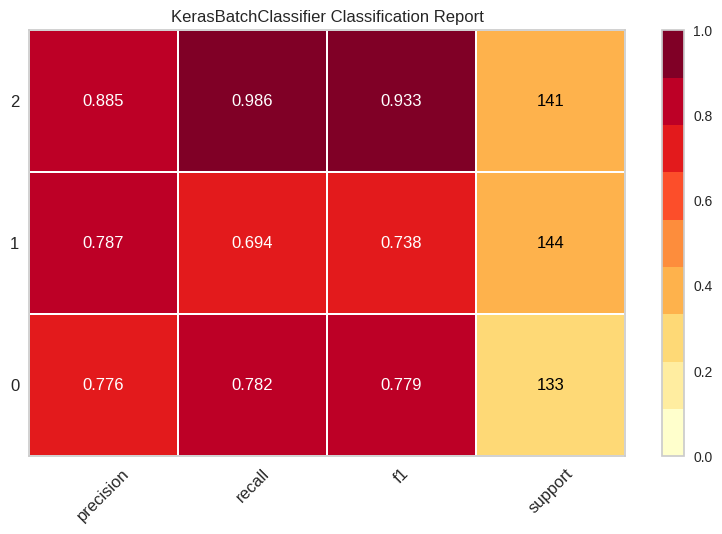

14/14 [==============================] - 0s 10ms/step - loss: 0.4724 - accuracy: 0.8206


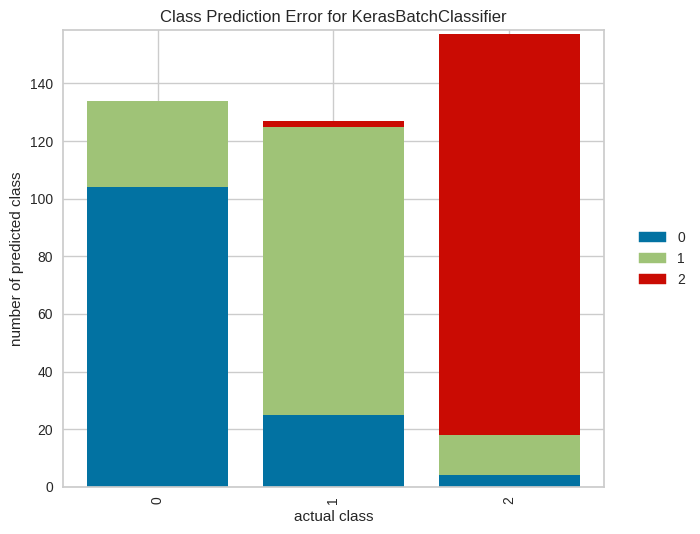

14/14 [==============================] - 0s 10ms/step


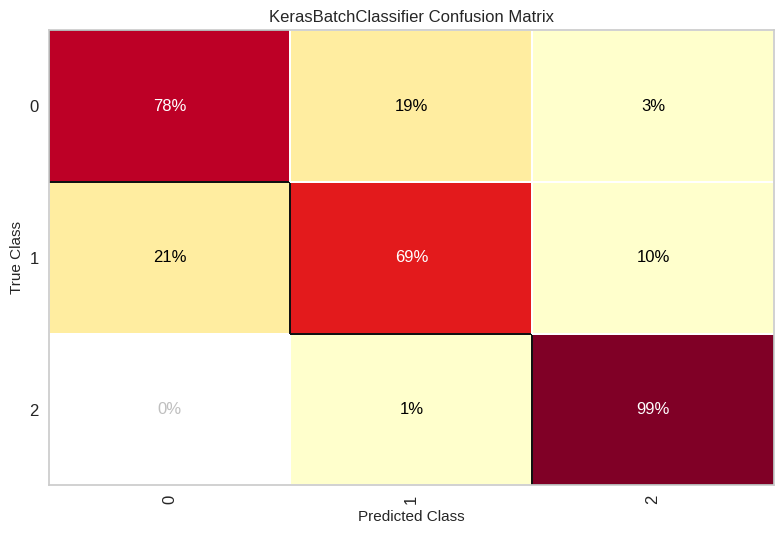

14/14 [==============================] - 0s 10ms/step


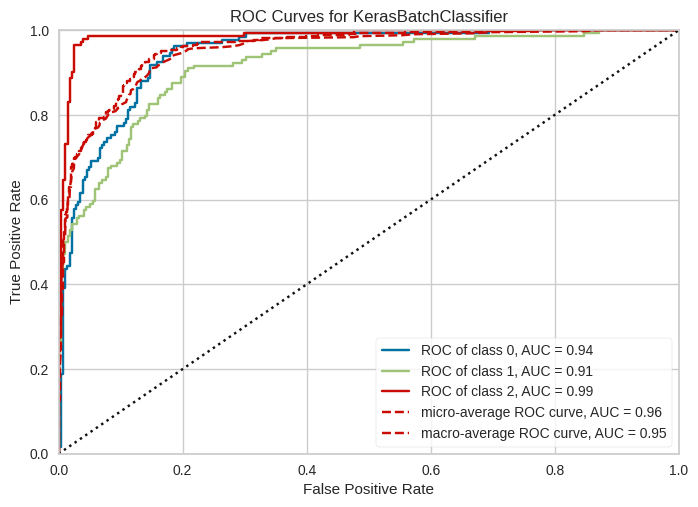

In [38]:
classifier_metrics()
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz()]